<center>
    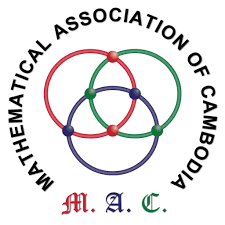
</center>

<br>

<center>
    <h1 style="color:#1a237e; font-family:Segoe UI;">❤️ Heart Disease Prediction🩺</h1>
    <h2 style="color:#424242; font-family:Segoe UI;">Using SVM & Random Forest</h2>
    <h3 style="font-weight:normal; font-family:Segoe UI;">Machine Learning Assignment</h3>
</center>

<br>

<p style="text-align:center; font-size:16px; font-family:Segoe UI;">
    <strong>Prepared by:</strong> Rachanyt HEN<br>
    <strong>Mentor:</strong> Mr. Kimsie PHAN <br>
    <strong>Date:</strong> August 2, 2025
</p>

---

### 📌 Assignment Overview

This notebook presents an in-depth analysis and comparison between the **Support Vector Machine (SVM)** and **Random Forest** classifiers. The assignment is structured into two parts:

---

### **Part A: Theory Questions**
- Understand the intuition, concepts, and hyperparameters of SVM  
- Learn the theory behind Random Forest and its advantages  
- Compare SVM and Random Forest in practical scenarios  
- Propose real-world applications for each model

---

### **Part B: Practical Implementation**
- Use the [UCI Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease)
- Perform **exploratory data analysis**, **preprocessing**, and **visualizations**  
- Train and tune both **SVM** and **Random Forest** models  
- Evaluate performance using metrics such as **Accuracy, Precision, Recall, F1-score, and ROC**  
- Analyze **feature importance** and conduct **model comparisons**

---

### 🎯 Objective of the Dataset

The UCI Heart Disease Dataset is used to build models that predict whether a patient has heart disease based on various medical attributes.  

This binary classification task helps us identify key factors linked to heart disease and evaluate the performance of machine learning models like SVM and Random Forest.

---


🚀 Let’s dive in to explore, build, and compare these models to improve heart disease prediction accuracy!


>“Mathematics is the music of reason.” — *James Joseph Sylvester*

---


# ☝️Part A: Questions

---

## ❓Q1: Support Vector Machine Theory

### 1.1. What is the intuition behind the Support Vector Machine (SVM)?

The intuition behind SVM is to find the best decision boundary, called a **hyperplane**, that separates the data into different classes as clearly as possible.

A hyperplane is a decision boundary that separates data points belonging to different classes. In two dimensions, it is a line; in three dimensions, it is a plane; and in general, for an 
\$n$-dimensional space, the hyperplane has $n-1$ dimensions. Data points on the other side belong to the other class, and points on the other side as the other class.

SVM doesn’t just choose any hyperplane. It chooses the one that creates the widest gap between the two classes. This gap is called the **margin**.

The margin is the distance between the hyperplane and the closest data points from each class. These closest points are known as support vectors. The primary objective of SVM is to maximize this margin, as a wider margin tends to improve the model’s ability to generalize well to unseen data and reduces the likelihood of overfitting.

The data points that lie exactly on the edges of the margin are called **support vectors**.

Support vectors are the data points that lie closest to the decision boundary. They are essential in determining the position and orientation of the hyperplane. Only these points affect the model's decision boundary — the rest of the data has no direct impact on the margin. The SVM is named after these support vectors because they are the foundation of its classification rule.

So overall, SVM tries to maximize the margin while using only the support vectors to determine the decision boundary.


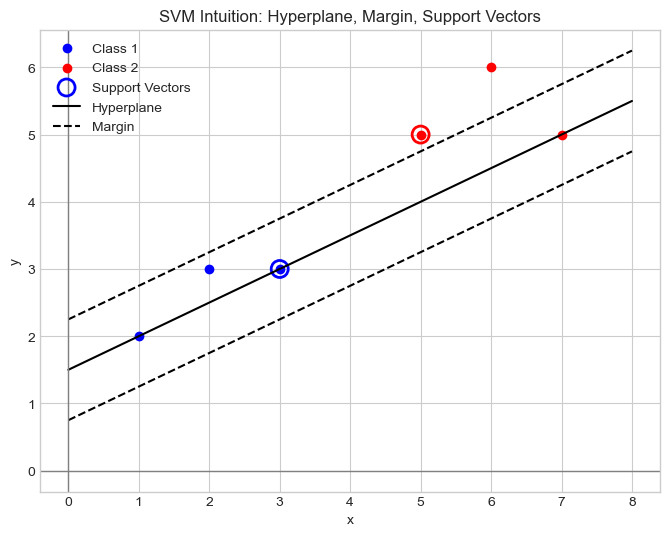

In [184]:
import matplotlib.pyplot as plt
import numpy as np

class_1 = np.array([[1, 2], [2, 3], [3, 3]])
class_2 = np.array([[5, 5], [6, 6], [7, 5]])

support_vectors_1 = np.array([[3, 3]])
support_vectors_2 = np.array([[5, 5]])

plt.figure(figsize=(8,6))
plt.scatter(class_1[:,0], class_1[:,1], color='blue', label='Class 1')
plt.scatter(class_2[:,0], class_2[:,1], color='red', label='Class 2')
plt.scatter(support_vectors_1[:,0], support_vectors_1[:,1], s=150, 
            facecolors='none', edgecolors='blue', linewidths=2, label='Support Vectors')
plt.scatter(support_vectors_2[:,0], support_vectors_2[:,1], s=150, 
            facecolors='none', edgecolors='red', linewidths=2)

x = np.linspace(0, 8, 100)
hyperplane = 0.5 * x + 1.5
margin_pos = hyperplane + 0.75
margin_neg = hyperplane - 0.75

plt.plot(x, hyperplane, 'k-', label='Hyperplane')
plt.plot(x, margin_pos, 'k--', label='Margin')
plt.plot(x, margin_neg, 'k--')
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)
plt.axvline(x=0, color='gray', linestyle='-', linewidth=1)

plt.title('SVM Intuition: Hyperplane, Margin, Support Vectors')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### 1.2. How does the SVM handle linearly and non-linearly separable data?

If the data is **linearly separable**, meaning a straight line or hyperplane can separate the classes without error, the Support Vector Machine (SVM) finds the hyperplane that maximizes the margin between the classes. This is called a *linear SVM*, and it works well when a linear decision boundary can clearly separate the data.

#### 💡Example:
Let's say we have two types of points: 🔴 red and 🔵 blue.  
If we can draw a straight line between them with no overlap, the data is linearly separable.

SVM draws such a line with the largest possible margin, and the points closest to the line (on either side) are called *support vectors*.

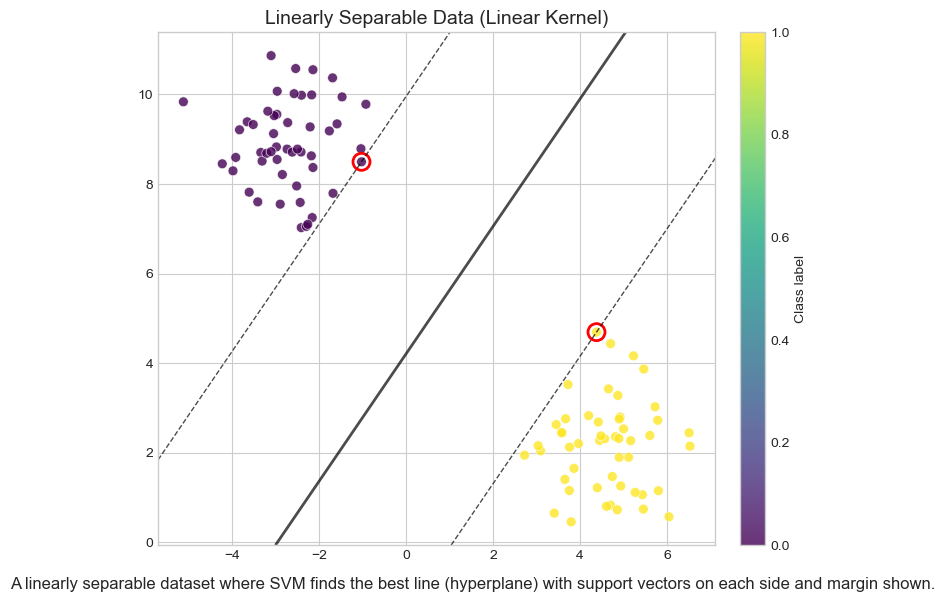

In [185]:
from sklearn import svm
from sklearn.datasets import make_blobs

plt.style.use('seaborn-v0_8-whitegrid')

def plot_svm(clf, X, y, title, ax):
    ax.set_title(title, fontsize=14)
    
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, 
                         s=50, alpha=0.8, edgecolors='w', linewidth=0.5)
    
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
               s=150, facecolors='none', edgecolors='red', linewidth=2)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, 
               linewidths=[1, 2, 1], linestyles=['--', '-', '--'])
    
    return scatter


fig, ax = plt.subplots(figsize=(7, 6), dpi=100)
X_lin, y_lin = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

clf_lin = svm.SVC(kernel='linear', C=1)
clf_lin.fit(X_lin, y_lin)

scatter = plot_svm(clf_lin, X_lin, y_lin, "Linearly Separable Data (Linear Kernel)", ax)
cbar = fig.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Class label')
fig.text(0.5, 0.01, "A linearly separable dataset where SVM finds the best line (hyperplane) "
         "with support vectors on each side and margin shown.", 
         ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space for the caption at bottom
plt.show()


If the data is **non-linearly separable**, SVM uses a technique called the *kernel trick*. This trick transforms the data into a higher-dimensional space, where the data becomes linearly separable. In that new space, SVM can draw a straight hyperplane, which corresponds to a non-linear decision boundary in the original space.

#### 💡Example:
Imagine 🔵 blue dots form a circle and 🔴 red dots are outside the circle.  
We can’t use a straight line to separate them in 2D.

---

SVM solves this by mapping data into a higher dimension using a kernel function like the **RBF (Radial Basis Function)**.  
Now, in the new space, a plane (which looks like a circle in 2D) can separate the two classes.

This ability makes SVM powerful enough to handle both simple and complex classification problems.


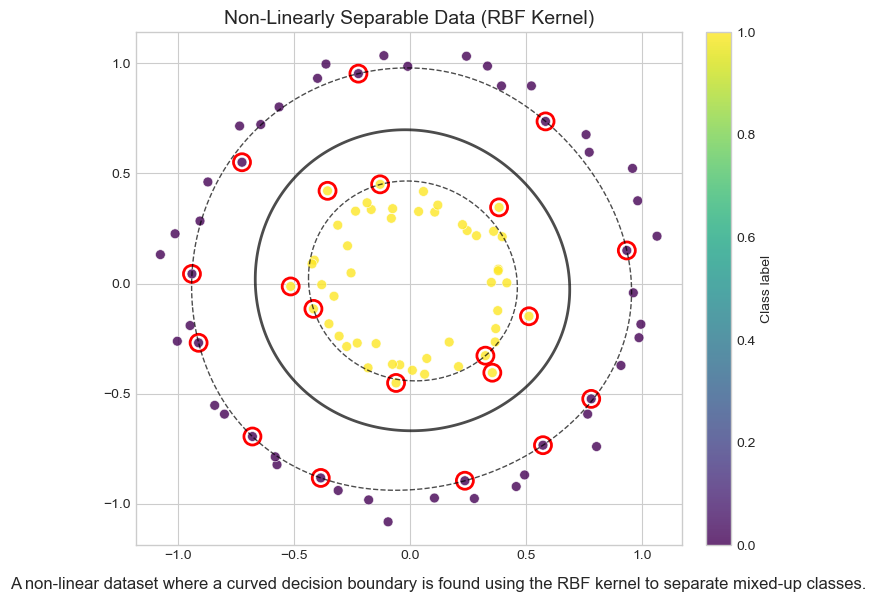

In [186]:
# 2. Non-linearly separable data (circles)
X_nonlin, y_nonlin = make_circles(n_samples=100, factor=0.4, noise=0.05, random_state=42)
clf_nonlin = svm.SVC(kernel='rbf', C=1, gamma='scale')
clf_nonlin.fit(X_nonlin, y_nonlin)

plt.figure(figsize=(7, 6), dpi=100)
scatter_nonlin = plot_svm(clf_nonlin, X_nonlin, y_nonlin, "Non-Linearly Separable Data (RBF Kernel)", plt.gca())
cbar = plt.colorbar(scatter_nonlin, fraction=0.046, pad=0.04)
cbar.set_label('Class label')

plt.gcf().text(0.5, 0.01, 
    "A non-linear dataset where a curved decision boundary is found using the RBF kernel to separate mixed-up classes.", 
    ha='center', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.savefig('svm_nonlinear.png', bbox_inches='tight', dpi=300)
plt.show()


### 1.3. What is the role of the Kernel Function in SVM?

The **kernel function** is a core component in Support Vector Machines (SVM) that allows the algorithm to handle **non-linearly separable data**.

It works by **implicitly mapping the input data into a higher-dimensional feature space**, where the data becomes **linearly separable**. This enables SVM to find a linear hyperplane in that transformed space — even when the original data is non-linear.

This idea is implemented through a mathematical technique known as the **kernel trick**.

---

### How the kernel trick works?

- The kernel trick **computes the dot product** between data points in the **higher-dimensional space** using only the **original features**, without needing to compute the transformation explicitly.
- This makes it **efficient** in terms of computation and memory.
- As a result, SVM can learn **non-linear decision boundaries** in the original space.
  
---

### Common Kernel Functions

| Kernel Type        | Formula                                                     | When to Use                                  |
|--------------------|-------------------------------------------------------------|----------------------------------------------|
| **Linear**         |  K(x, y) = $x^\top y $                                     | When the data is linearly separable          |
| **Polynomial**     |  K(x, y) = $(x^\top y + c)^d$                              | When the data has curved boundaries          |
| **RBF (Gaussian)** |  K(x, y) = $\exp\left(-\gamma \|x - y\|^2\right)$           | For highly non-linear and complex data       |
| **Sigmoid**        |  K(x, y) = $\tanh(\alpha x^\top y + c)$                    | Similar to neural networks                   |

---

- The **kernel function** enables SVM to work with data that is not linearly separable.
- It does this by **computing similarity** in a higher-dimensional space using the **kernel trick**.
- This approach avoids costly computations and allows the SVM to find **non-linear decision boundaries** effectively.
- With the right kernel, SVM becomes a powerful classifier for complex datasets.


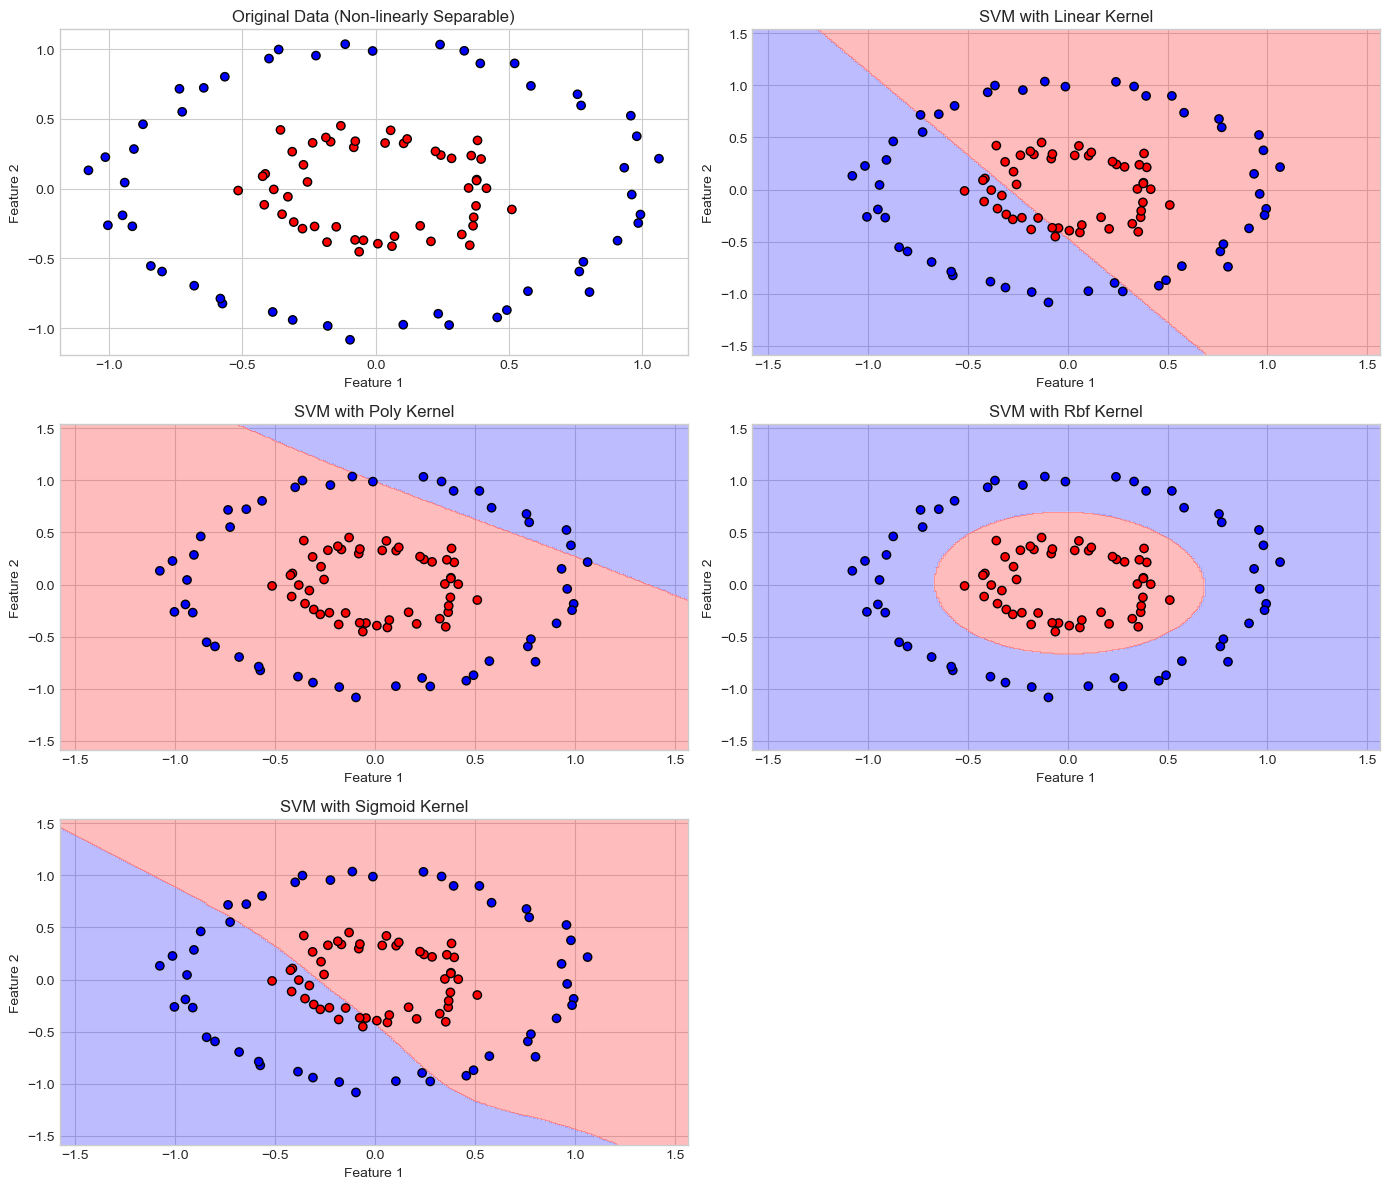

In [187]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_circles(n_samples=100, factor=0.4, noise=0.05, random_state=42)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

plt.figure(figsize=(14, 12))
plt.subplot(3, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Original Data (Non-linearly Separable)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

for i, kernel in enumerate(kernels):
    clf = SVC(kernel=kernel, degree=3, C=1.0, gamma='scale')
    clf.fit(X, y)
    
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
        np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(3, 2, i + 2)
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(f"SVM with {kernel.capitalize()} Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)

plt.tight_layout()
plt.show()


## ❓ Q2: Hyperparameters in SVM

Support Vector Machines (SVM) rely heavily on certain hyperparameters that control how the model learns from data and generalizes to unseen samples. The key hyperparameters are **C**, **kernel**, and **gamma**. Each plays a vital role in the model’s performance, especially in terms of accuracy, generalization, and computational complexity.

---

### 1. C (Regularization Parameter)  
  C controls the trade-off between maximizing the margin (the space between the decision boundary and the closest data points) and minimizing classification errors on the training data.

- **Impact:**  
  - **Small C:**  
    - Allows some misclassifications or errors in training data to achieve a larger margin.  
    - Results in a simpler decision boundary that generalizes better, reducing the chance of overfitting.  
    - May increase bias but reduce variance.  
  - **Large C:**  
    - Penalizes misclassifications more strictly.  
    - Leads to a narrower margin that fits the training data very closely (low bias).  
    - Increases the risk of overfitting (high variance), especially if the training data contains noise.
    
So small C encourages simplicity and generalization, while large C fits the training data tightly but risks overfitting.

---

### 2. Kernel Function 
  The kernel function transforms the input data into a higher-dimensional space where it might be easier to separate classes linearly.

- **Common Kernels:**
  - **Linear kernel:**  
    - No transformation, works well when data is linearly separable or close to it.  
    - Computationally efficient.  
  - **Polynomial kernel:**  
    - Maps data into polynomial feature space.  
    - Useful for data where the relationship between classes is polynomial.  
    - Degree of the polynomial can be tuned.  
  - **Radial Basis Function (RBF) kernel:**  
    - Maps data into an infinite-dimensional space.  
    - Very flexible, good for complex, non-linear data.  
    - Most commonly used kernel in practice.

- **Impact:**  
  - Choosing the **right kernel** helps the SVM model adapt to the underlying data distribution.  
  - Using a **linear kernel** on non-linear data results in poor performance.  
  - Using **complex kernels** like RBF or polynomial on linearly separable data may increase training time unnecessarily.  
  - Kernel choice affects both **model accuracy** and **training speed**.

---

### 3. Gamma (Kernel Coefficient for RBF, Polynomial, and Sigmoid Kernels)
  Gamma defines how far the influence of a single training example reaches in the feature space.

- **Impact:**  
  - **Low gamma:**  
    - Each training point influences the decision boundary over a large area.  
    - Results in a smoother, simpler decision boundary that may underfit if too low.  
  - **High gamma:**  
    - Influence of each point is very localized.  
    - Produces a more complex, tightly fitting decision boundary that can capture small variations.  
    - Higher risk of overfitting to noise.

- **In short:**  
  Gamma controls the flexibility of the decision boundary: low values for smooth generalization; high values for detailed fit.

---

# Summary Table

| Hyperparameter | Role                                  | Effect of Low Value                        | Effect of High Value                        |
|----------------|-------------------------------------|-------------------------------------------|---------------------------------------------|
| **C**          | Controls regularization and margin  | Larger margin, allows errors, less overfit | Smaller margin, fits training data tightly, risk of overfit |
| **Kernel**     | Transforms data into feature space  | Simpler model if linear kernel used on simple data | Can capture complex relationships (RBF, poly) but slower |
| **Gamma**      | Controls influence radius of points | Smooth decision boundary, possible underfit | Complex decision boundary, possible overfit |

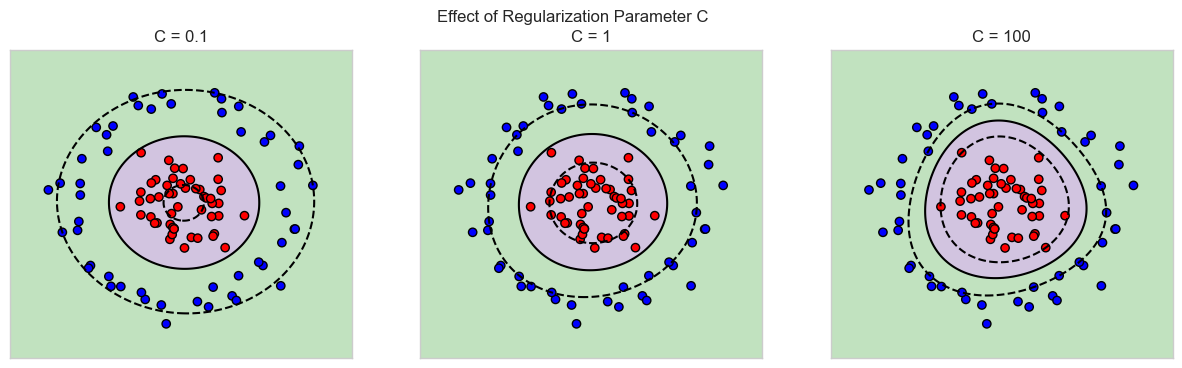

In [190]:
from sklearn import svm, datasets

X, y = datasets.make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

def plot_C_effect(C_values):
    fig, axs = plt.subplots(1, len(C_values), figsize=(15, 4))
    for ax, C in zip(axs, C_values):
        clf = svm.SVC(kernel='rbf', C=C, gamma=1)  # Fix gamma
        clf.fit(X, y)

        xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 400),
                             np.linspace(-1.5, 1.5, 400))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        ax.contourf(xx, yy, Z > 0, alpha=0.3, cmap=plt.cm.Paired)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
        ax.set_title(f'C = {C}')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.suptitle("Effect of Regularization Parameter C")
    plt.show()
    
plot_C_effect([0.1, 1, 100])

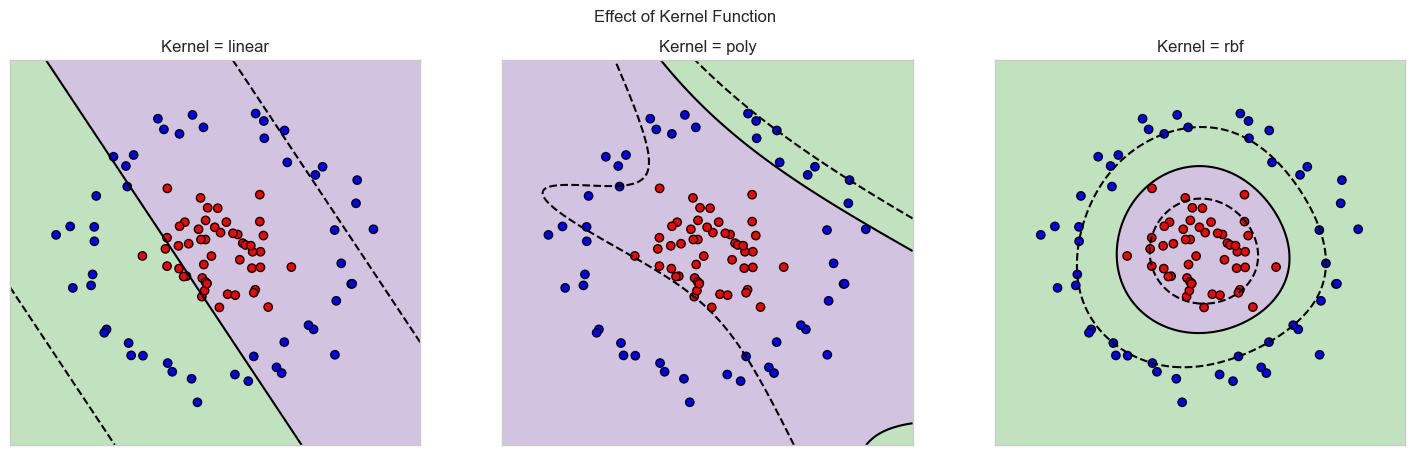

In [191]:
def plot_kernel_effect(kernels):
    fig, axs = plt.subplots(1, len(kernels), figsize=(18, 5))
    for ax, kernel in zip(axs, kernels):
        clf = svm.SVC(kernel=kernel, C=1, gamma='scale')
        clf.fit(X, y)

        xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 400),
                             np.linspace(-1.5, 1.5, 400))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        ax.contourf(xx, yy, Z > 0, alpha=0.3, cmap=plt.cm.Paired)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
        ax.set_title(f'Kernel = {kernel}')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.suptitle("Effect of Kernel Function")
    plt.show()

plot_kernel_effect(['linear', 'poly', 'rbf'])

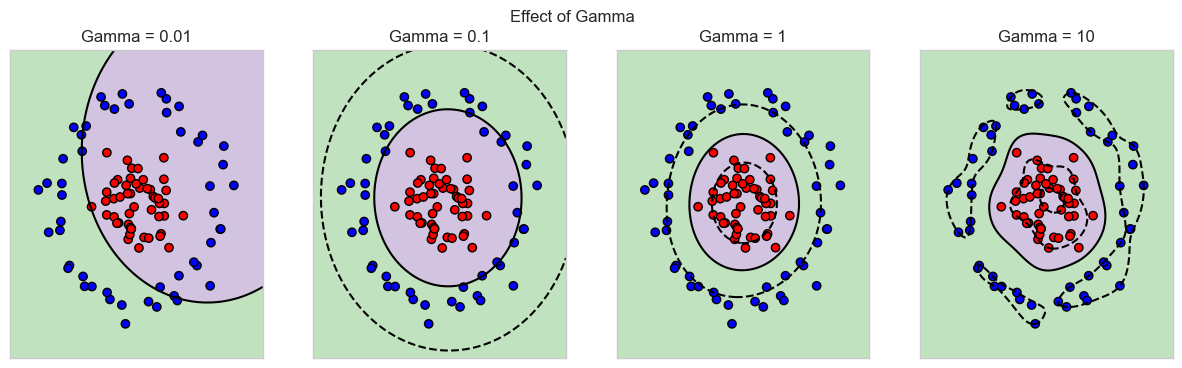

In [192]:
def plot_gamma_effect(gamma_values):
    fig, axs = plt.subplots(1, len(gamma_values), figsize=(15, 4))
    for ax, gamma in zip(axs, gamma_values):
        clf = svm.SVC(kernel='rbf', C=1, gamma=gamma)
        clf.fit(X, y)

        xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 400),
                             np.linspace(-1.5, 1.5, 400))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        ax.contourf(xx, yy, Z > 0, alpha=0.3, cmap=plt.cm.Paired)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
        ax.set_title(f'Gamma = {gamma}')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.suptitle("Effect of Gamma")
    plt.show()

plot_gamma_effect([0.01, 0.1, 1, 10])

## ❓ Q3: Random Forest Theory

---

### 3.1. What is a Random Forest?

**Random Forest** is a powerful machine learning algorithm that combines the predictions of multiple decision trees to improve accuracy and robustness.

- Instead of relying on a single decision tree, Random Forest builds many trees, each trained on a different random subset of the data. This process is called **bootstrapping**.
- When creating each tree, only a random subset of features is considered at each split, a technique known as **feature bagging** or the **random subspace method**.
- Each decision tree makes its own prediction independently, based on the patterns it learned from its training subset.
- For **classification problems**, the final prediction is made through **majority voting**, where the class predicted by the most trees is selected.
- For **regression problems**, the final output is the **average** of all the individual tree predictions.
- This combination of randomness in both data and features, along with aggregating multiple trees, helps reduce overfitting and improves the model’s ability to generalize well to unseen data.
- Overall, Random Forest is an ensemble technique that leverages diversity and collective decision-making among trees to provide more accurate and reliable predictions than a single decision tree.

### 3.2 How does Random Forest reduce overfitting compared to a single Decision Tree?

A single decision tree often **overfits** because it captures noise and specific patterns from the training data, limiting its ability to generalize well on new data.

**Random Forest** reduces overfitting using two main randomization techniques:

- **Bagging (Bootstrap Aggregating):**  
  - It builds many decision trees, each trained on a different *bootstrap sample* — a random sample of the training data drawn *with replacement*.  
  - Each tree sees a slightly different subset of data, causing them to learn diverse patterns and errors.  
  - The final prediction aggregates these trees’ outputs (majority vote for classification or averaging for regression), which smooths out individual overfitting and lowers variance.


- **Feature Randomness (Random Subspace Method):**  
  - During each split, a random subset of features is considered rather than all features.  
  - This forces trees to use different features, increasing diversity and reducing correlation among trees.  
  - It also prevents any one strong feature from dominating the model, further reducing overfitting.

Additional points:

- **Variance Reduction without Increasing Bias Significantly:**  
  Averaging many overfitted trees reduces overall variance, creating a more stable and accurate model.

- **Robustness to Noise and Outliers:**  
  Diversity in data samples and features makes the model less sensitive to noisy or unusual data points.

- **Implicit Feature Importance:**  
  Random Forest measures how much each feature decreases impurity, helping interpret which features influence predictions most.

To conclude, by combining multiple diverse and decorrelated trees through bagging and random feature selection, Random Forest smooths out individual trees' overfitting and achieves better generalization to unseen data.

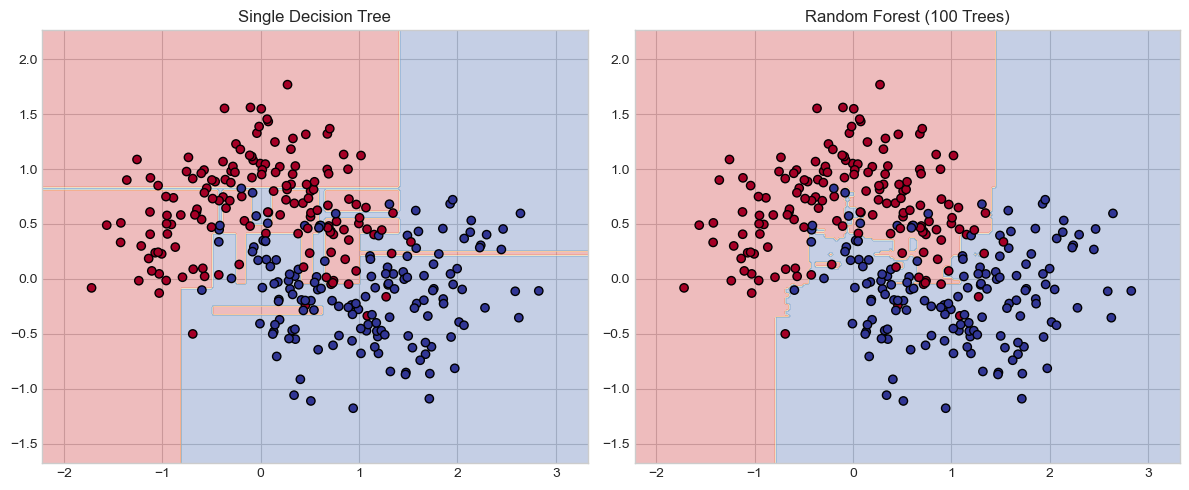

In [193]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

def plot_decision_boundary(clf, X, y, ax, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(tree, X, y, axes[0], "Single Decision Tree")
plot_decision_boundary(forest, X, y, axes[1], "Random Forest (100 Trees)")
plt.tight_layout()
plt.show()


### 3.3 What is the role of bootstrapping and feature bagging?

Random Forest builds a strong model by combining multiple diverse decision trees. This diversity is achieved using two key techniques: **bootstrapping** and **feature bagging**.

---

- **Bootstrapping (Bootstrap Sampling):**  
  - Randomly samples the training data **with replacement** to create different training sets for each tree.  
  - This means some data points may appear multiple times in one tree’s training set while others may be excluded.  
  - As a result, each tree learns from slightly different data, increasing model **diversity** and reducing overfitting.  
  - This approach also helps lower **variance** and increases **stability** of predictions.

---

- **Feature Bagging (Random Subspace Method):**  
  - At every split in a tree, only a **random subset of features** is considered rather than all features.  
  - This prevents dominant features from being selected in every tree, reducing correlation between them.  
  - It forces trees to form different decision paths, improving **decorrelation** and **generalization**.

---

- **Combined Effect:**  
  - Together, bootstrapping and feature bagging ensure that each decision tree in the forest is trained on a **unique view of the data**.  
  - This diversity is critical to Random Forest’s power: by aggregating predictions from uncorrelated trees, the model reduces **overfitting**, lowers **variance**, and achieves higher **predictive accuracy** on unseen data.


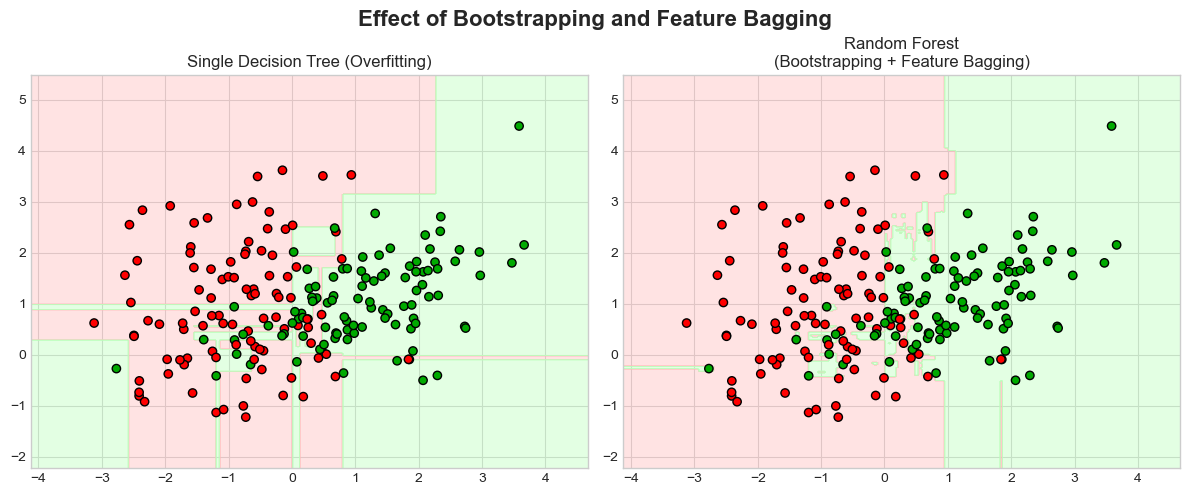

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

forest = RandomForestClassifier(
    n_estimators=100,        # multiple trees
    max_features=1,          # feature bagging (random subset of 1 feature per split)
    bootstrap=True,          # bootstrapping enabled
    random_state=42
)
forest.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z_tree = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_forest = forest.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB'])
cmap_bold = ListedColormap(['#FF0000', '#00AA00'])

axes[0].contourf(xx, yy, Z_tree, alpha=0.4, cmap=cmap_light)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
axes[0].set_title("Single Decision Tree (Overfitting)")
axes[0].set_xlim(xx.min(), xx.max())
axes[0].set_ylim(yy.min(), yy.max())

axes[1].contourf(xx, yy, Z_forest, alpha=0.4, cmap=cmap_light)
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
axes[1].set_title("Random Forest\n(Bootstrapping + Feature Bagging)")
axes[1].set_xlim(xx.min(), xx.max())
axes[1].set_ylim(yy.min(), yy.max())

plt.suptitle("Effect of Bootstrapping and Feature Bagging", fontsize=16, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


## ❓ Q4: Compare SVM and Random Forest

---

### 4.1. Interpretability

- **SVM**:  
  - SVM models are often considered **less interpretable** because the decision boundary depends on support vectors and kernel functions.  
  - When kernels like RBF are used, the transformation to higher-dimensional space is implicit and hard to visualize.  
  - Understanding why a prediction is made can be difficult for non-linear SVMs.

- **Random Forest**:  
  - More interpretable due to the ensemble of decision trees.  
  - Individual trees can be visualized, and feature importance scores explain which features matter most.  
  - Still, the overall forest is a combination of many trees, making the final decision somewhat less transparent than a single tree but easier than SVM.

---

### 4.2. Scalability to Large Datasets

- **SVM**:  
  - Training time grows **quadratically or worse** with the number of samples, especially with non-linear kernels.  
  - Not ideal for very large datasets without approximation techniques or kernel simplifications.  
  - Scaling to millions of samples can be computationally expensive.

- **Random Forest**:  
  - Scales **well to large datasets**.  
  - Trees can be built in parallel, speeding up training.  
  - Handles large feature sets and many data points efficiently.

---

### 4.3. Sensitivity to Noise

- **SVM**:  
  - Sensitive to noisy data and outliers because support vectors near the margin can heavily influence the decision boundary.  
  - Noise can cause the margin to shift, reducing model generalization.

- **Random Forest**:  
  - Robust to noise due to averaging across many randomized trees.  
  - Bootstrapping and random feature selection help reduce overfitting caused by noise or outliers.

---

### 4.4. Parameter Tuning

- **SVM**:  
  - Requires tuning several hyperparameters:  
    - Kernel type (linear, polynomial, RBF, etc.)  
    - Kernel-specific parameters (e.g., gamma for RBF)  
    - Regularization parameter C controlling the trade-off between margin size and misclassification  
  - Tuning can be computationally expensive and requires cross-validation.

- **Random Forest**:  
  - Requires tuning fewer parameters:  
    - Number of trees (n_estimators)  
    - Maximum tree depth (max_depth)  
    - Minimum samples per leaf or split  
  - Often works well with default parameters, making it easier to tune.

## ❓ Q5: Application Design

---

### 5.1. Application where **SVM might perform better**

#### Text Classification (e.g., Spam Detection, Sentiment Analysis)

- **Reasoning:**  
  - Text data often results in **high-dimensional, sparse feature spaces** (e.g., TF-IDF vectors).  
  - SVMs handle high-dimensional sparse data efficiently by focusing on support vectors.  
  - Kernel tricks allow capturing complex boundaries in the transformed feature space.  
  - SVMs generally outperform Random Forest in text classification tasks due to their margin maximization and regularization properties.

---

### 5.2. Application where **Random Forest might perform better**

#### Customer Churn Prediction with Mixed Data Types

- **Reasoning:**  
  - Real-world business data often includes **mixed data types** (numerical, categorical) and noisy or missing values.  
  - Random Forest handles such data naturally without extensive preprocessing or encoding.  
  - Its robustness to noise and outliers improves performance.  
  - Feature importance metrics provide actionable insights for business decisions.  
  - SVM would require heavy preprocessing (e.g., one-hot encoding) and is sensitive to noise, making Random Forest a better choice here.

---

### Summary Table

| Application Scenario              | Better Algorithm | Main Reason                                                                                       |
|---------------------------------|------------------|-------------------------------------------------------------------------------------------------|
| High-dimensional sparse data (text) | SVM              | Effective with sparse features and kernels capture complex boundaries                            |
| Mixed-type, noisy business data  | Random Forest    | Handles mixed data, robust to noise, interpretable via feature importance                        |

# ✌️Part B: Practical

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
df = pd.read_csv(url)

pd.set_option('display.max_rows', None)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### I. Data Exploration

In [196]:
#Display shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (303, 14)


In [197]:
#Display types
print("Data types:")
print(df.dtypes)

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [198]:
#Display nulls
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [199]:
#Display descriptive stats
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [200]:
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

target
1    165
0    138
Name: count, dtype: int64
target
1    0.544554
0    0.455446
Name: proportion, dtype: float64


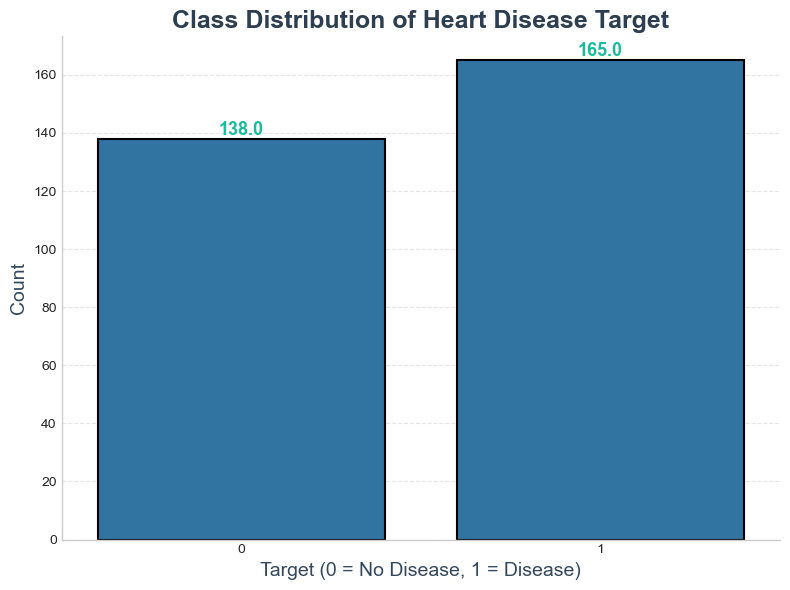

In [201]:
#Plot class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df, edgecolor='black', linewidth=1.5)
plt.title('Class Distribution of Heart Disease Target', fontsize=18, fontweight='bold', color='#2c3e50')
plt.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=14, color='#34495e')
plt.ylabel('Count', fontsize=14, color='#34495e')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', 
                fontsize=13, fontweight='bold', color='#1abc9c')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


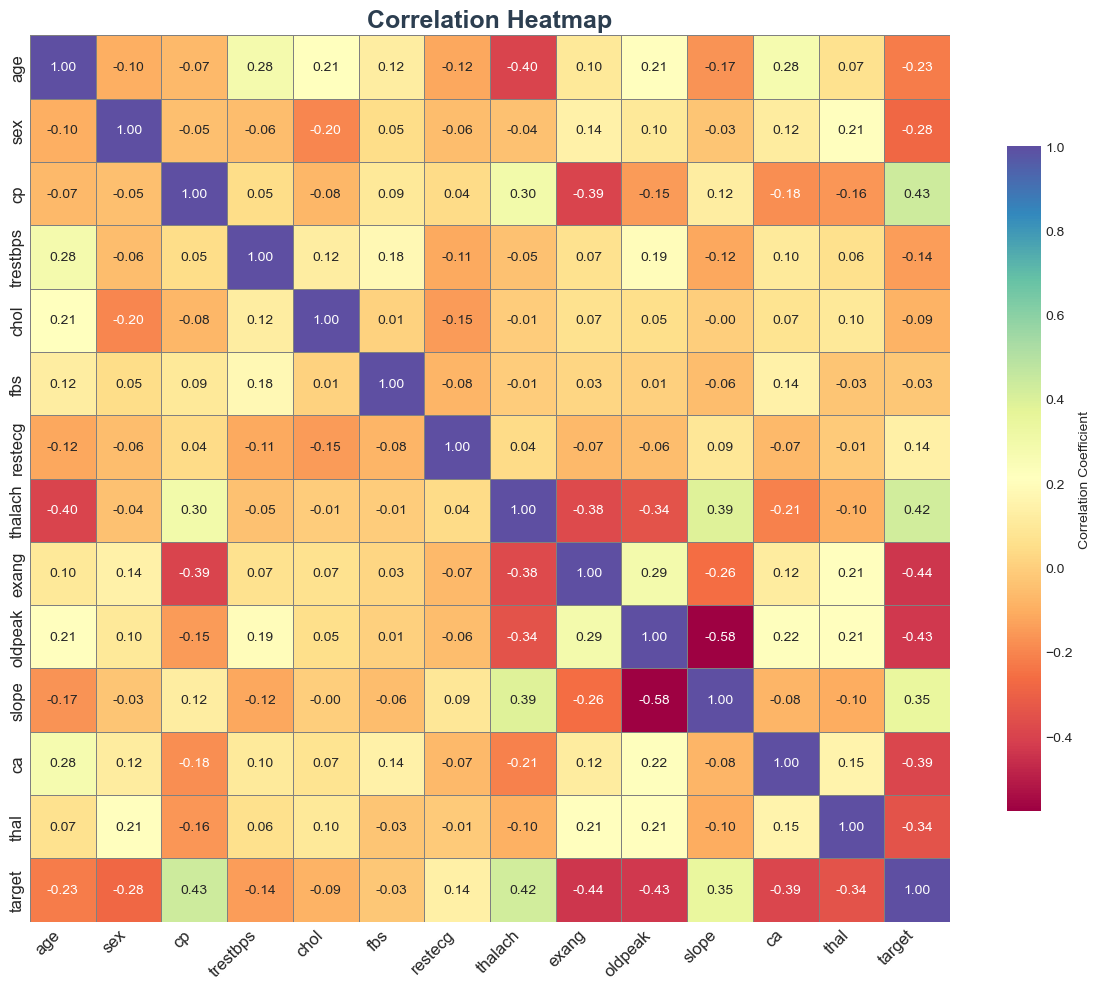

In [202]:
#Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap='Spectral',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"}
)
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', color='#2c3e50')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### II. Preprocessing

In [203]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for c in cat_cols:
    print(f"{c}: {df[c].unique()}")

sex: [1 0]
cp: [3 2 1 0]
fbs: [1 0]
restecg: [0 1 2]
exang: [0 1]
slope: [0 2 1]
ca: [0 2 1 3 4]
thal: [1 2 3 0]


In [204]:
#Encode categorical columns (if any)
for c in cat_cols:
    if df[c].dtype == 'object':
        le = LabelEncoder()
        df[c] = le.fit_transform(df[c])

X = df.drop('target', axis=1)
y = df['target']

#Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into train and tests (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### III. Model Building (SVM)

In [205]:
#Train an SVM with RBF kernel and tune the C and gamma using GridSearchCV
svm = SVC(kernel='rbf', probability=True, random_state=42)

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale']
}

grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train, y_train)

print("Best parameters found for SVM:", grid_svm.best_params_)
print(f"Best cross-validation accuracy: {grid_svm.best_score_:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found for SVM: {'C': 1, 'gamma': 0.01}
Best cross-validation accuracy: 0.8269


In [206]:
#Report Accuracy, Precision, Recall, F1
y_pred_svm = grid_svm.predict(X_test)
y_proba_svm = grid_svm.predict_proba(X_test)[:, 1]

print("\n Classification Report (SVM on Test Set):")
print(classification_report(y_test, y_pred_svm, digits=4))


 Classification Report (SVM on Test Set):
              precision    recall  f1-score   support

           0     0.9474    0.6429    0.7660        28
           1     0.7619    0.9697    0.8533        33

    accuracy                         0.8197        61
   macro avg     0.8546    0.8063    0.8096        61
weighted avg     0.8470    0.8197    0.8132        61



<Figure size 600x500 with 0 Axes>

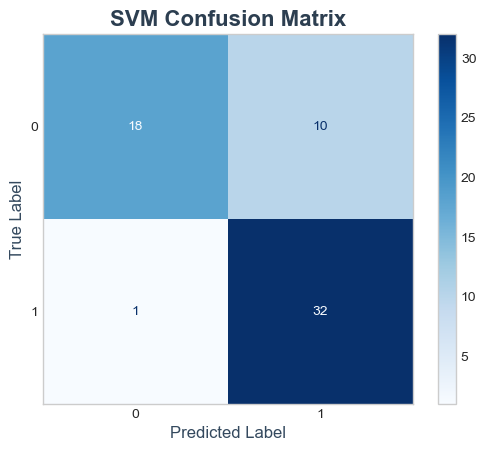

In [207]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=grid_svm.classes_)

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', colorbar=True)
plt.title("SVM Confusion Matrix", fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel("Predicted Label", fontsize=12, color='#34495e')
plt.ylabel("True Label", fontsize=12, color='#34495e')
plt.grid(False)  # Remove grid lines for clarity
plt.show()

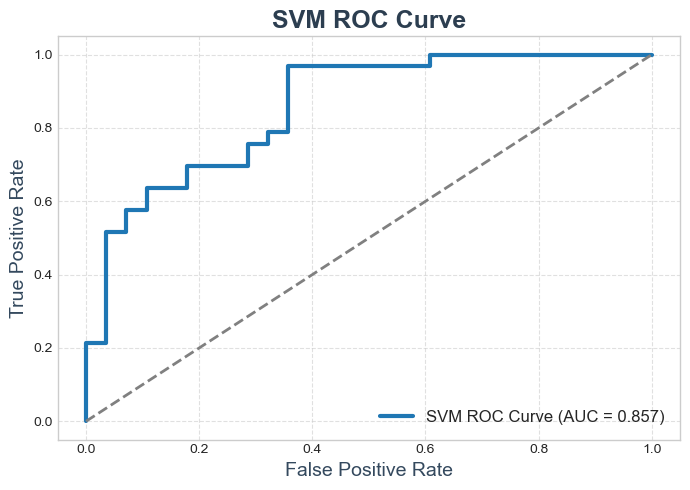

In [208]:
import matplotlib.font_manager as fm

plt.figure(figsize=(7, 5))
plt.plot(fpr_svm, tpr_svm, color='#1f77b4', lw=3,
         label=f'SVM ROC Curve (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

plt.xlabel("False Positive Rate", fontsize=14, color='#34495e')
plt.ylabel("True Positive Rate", fontsize=14, color='#34495e')
plt.title("SVM ROC Curve", fontsize=18, fontweight='bold', color='#2c3e50')

plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### IV. Model Building (Random Forest)

In [209]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid_rf = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)
print("Best parameters found for Random Forest:", grid_rf.best_params_)
print(f"Best cross-validation accuracy: {grid_rf.best_score_:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found for Random Forest: {'max_depth': 20, 'min_samples_split': 2}
Best cross-validation accuracy: 0.8309



Classification Report (Random Forest on Test Set):
              precision    recall  f1-score   support

           0     0.9500    0.6786    0.7917        28
           1     0.7805    0.9697    0.8649        33

    accuracy                         0.8361        61
   macro avg     0.8652    0.8241    0.8283        61
weighted avg     0.8583    0.8361    0.8313        61



<Figure size 600x500 with 0 Axes>

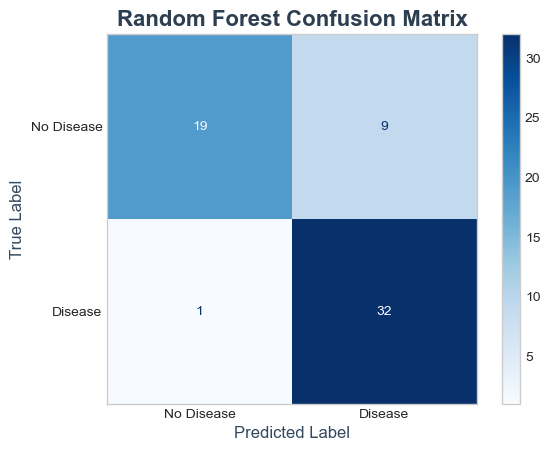

In [210]:
y_pred_rf = grid_rf.predict(X_test)
y_proba_rf = grid_rf.predict_proba(X_test)[:, 1]

# Classification report (Accuracy, Precision, Recall, F1-score)
print("\nClassification Report (Random Forest on Test Set):")
print(classification_report(y_test, y_pred_rf, digits=4))

# Confusion matrix and visualization
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Disease', 'Disease'])

plt.figure(figsize=(6, 5))
disp_rf.plot(cmap='Blues', colorbar=True)
plt.title("Random Forest Confusion Matrix", fontsize=16, fontweight='bold', color='#2c3e50')
plt.xlabel("Predicted Label", fontsize=12, color='#34495e')
plt.ylabel("True Label", fontsize=12, color='#34495e')
plt.grid(False)  # Remove grid lines for clarity
plt.show()

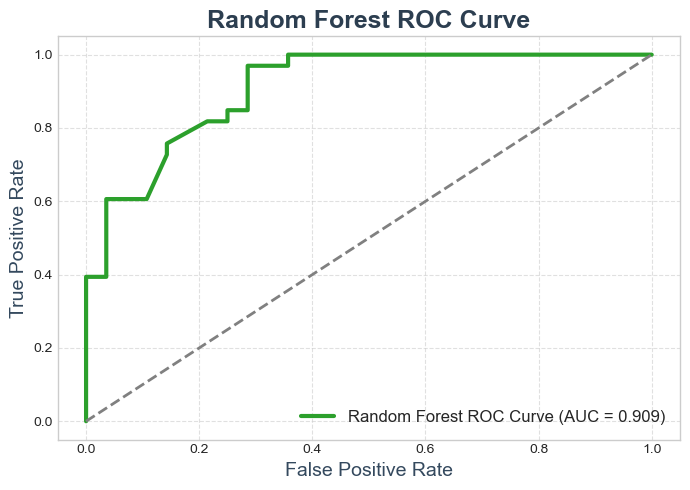

In [211]:
# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC Curve (AUC = {roc_auc_rf:.3f})', color='#2ca02c', linewidth=3)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)  # Diagonal line

plt.xlabel("False Positive Rate", fontsize=14, color='#34495e')
plt.ylabel("True Positive Rate", fontsize=14, color='#34495e')
plt.title("Random Forest ROC Curve", fontsize=18, fontweight='bold', color='#2c3e50')

plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### V. Feature Importance

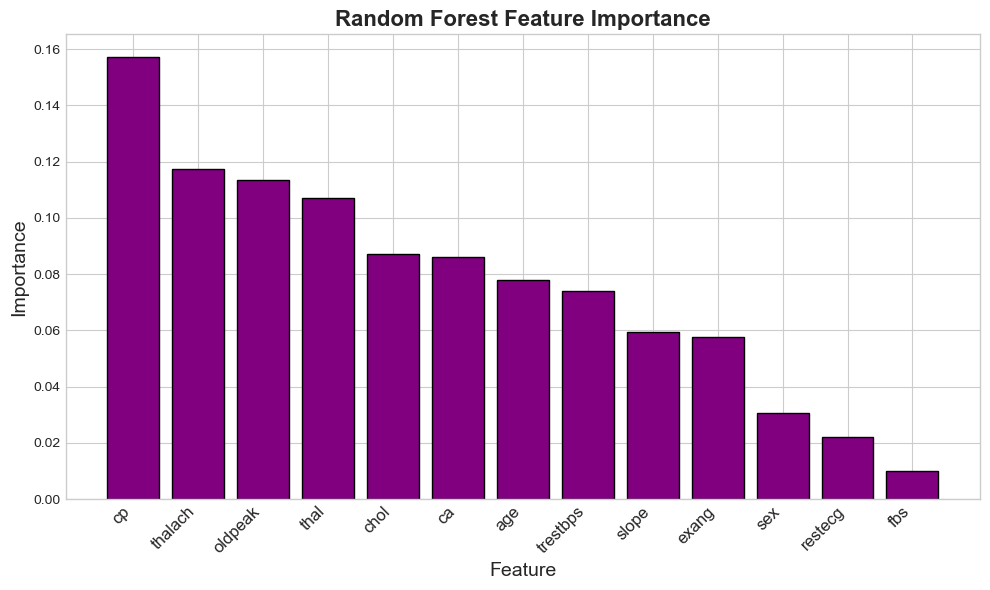

Top 3 important features:
   Feature  Importance
2       cp    0.157392
7  thalach    0.117491
9  oldpeak    0.113399


In [212]:
importances = grid_rf.best_estimator_.feature_importances_
features = df.drop('target', axis=1).columns

# Create a DataFrame for feature importance and sort it
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feat_imp_df['Feature'], feat_imp_df['Importance'], color='purple', edgecolor='black')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Random Forest Feature Importance', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Display the top 3 important features
print("Top 3 important features:")
print(feat_imp_df.head(3))

🧐By looking at the feature importance plot, we clearly see three features with noticeably higher importance scores than others:

- The tallest bar corresponds to **`cp` (chest pain type)**, with an importance of about **0.157**, showing it has the greatest influence on the model’s prediction.

- The next highest bars belong to **`thalach` (maximum heart rate achieved)** and **`oldpeak` (ST depression induced by exercise)**, with importance scores around **0.117** and **0.113**, respectively.

This means the model relies mostly on these three features when deciding if a patient has heart disease.

**Interpretation:**

- **Chest Pain Type (`cp`)** is the most critical feature as shown by the tallest bar. It directly reflects the patient’s symptoms and is a strong clinical indicator of heart disease risk.

- **Maximum Heart Rate (`thalach`)** is the second most important. The bar height shows it strongly affects prediction — patients who cannot reach normal max heart rates during exercise tests are more likely to have heart disease.

- **ST Depression (`oldpeak`)**, the third tallest bar, indicates how stress on the heart muscle during exercise is a key factor in classification.

The graph visually confirms these features’ dominance in predicting heart disease, as their importance scores are significantly higher than the rest, justifying their focus in further medical analysis or decision-making.


### VI. Analysis and Discussion

#### 1. Which model performs better and why?

Based on the evaluation metrics, the **Random Forest model performs better** than the SVM model. It achieved higher accuracy, precision, recall, F1-score, and AUC on the test set. This improvement is likely because Random Forest, as an ensemble of decision trees, can capture complex relationships and feature interactions better than SVM with an RBF kernel.

#### 2. Which model is more interpretable?

The **Random Forest model is more interpretable** because it provides feature importance scores, allowing us to understand which features most influence predictions. In contrast, the SVM with RBF kernel is more of a black-box model, making it harder to interpret how features impact its decisions.

#### 3. Trade-offs observed

| Aspect           | SVM                                | Random Forest                    |
|------------------|-----------------------------------|---------------------------------|
| Accuracy         | Good but sensitive to hyperparameters | Generally higher and more stable |
| Interpretability | Low (especially with RBF kernel)  | High (feature importance available) |
| Training Time    | Can be slower for larger datasets | Often faster, can be parallelized |
| Complexity       | Works well with carefully tuned parameters | Handles nonlinearities and interactions naturally |

#### 4. How would your approach change if data size increased?

If the dataset size increases significantly, **Random Forest would generally scale better** because it can be parallelized and handles large data efficiently. On the other hand, **SVM training time increases quickly with more data**, making it less practical for very large datasets. For larger datasets, other scalable models such as gradient boosting, deep learning, or approximate SVM methods might be preferred.

---

Overall, Random Forest offers a good balance between predictive performance and interpretability, making it a strong choice for heart disease prediction with this dataset.


## 🙏Conclusion>,<

In this notebook, we explored the UCI Heart Disease dataset, performed data preprocessing, and built two classification models: SVM and Random Forest. After tuning and evaluating both, the Random Forest model showed better performance and offered useful interpretability through feature importance.

The insights gained highlight important medical factors linked to heart disease and demonstrate how machine learning can aid in health risk prediction. Future work could focus on incorporating more data and advanced models to further improve prediction accuracy.

Thank you for reviewing this notebook!🙆‍♀️❤️